In [1]:
%matplotlib inline

import pandas
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

In [2]:
X = pandas.read_csv('./data.csv')
y = X['Rings']

In [3]:
def _data_clean_up(X):
    X['Sex'] = X['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))
    X.drop('Rings', inplace=True, axis=1)

Clean up data:

In [4]:
_data_clean_up(X)

Fit random forests for different number of trees and evaluate prediction:

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
 

def _r_forest_eval(X, y, max_trees):
    score_means = dict()
    k_fold = KFold(n_splits=5, random_state=1, shuffle=True)
    for estimators in range(1, max_trees + 1):
        r_f_regressor = RandomForestRegressor(n_estimators=estimators, random_state=1)
        score = cross_val_score(r_f_regressor, X, y, cv=k_fold, scoring='r2', verbose=0)
        mean = score.mean()
        score_means[estimators] = mean
    return score_means

In [8]:
scores_mean = _r_forest_eval(X, y, max_trees = 50)

Let's take a look at a plot of scores growth:

In [9]:
target_score = 0.52

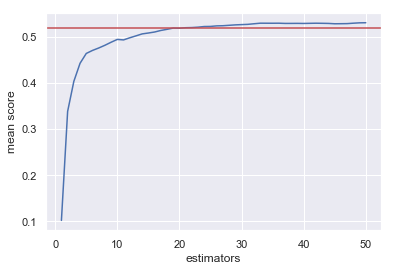

In [10]:
lists = sorted(scores_mean.items())
x, y = zip(*lists)  # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.axhline(y=target_score, color='r')
plt.xlabel('estimators')
plt.ylabel('mean score')
plt.show()

Mean score is stopped growing around 20.

In [11]:
def _min_trees_for_target(score_means, target_score):
    for trees in sorted(score_means.keys()):
        if score_means[trees] >= target_score:
            return trees

Let's check that:

In [12]:
min_estimators = _min_trees_for_target(scores_mean, target_score)
print(min_estimators)

22
